# Paris Metro Air Pollution 
Nina, Chetan, Camille, Selim

In [0]:

import pandas as pd
import numpy as np
import csv
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pydot

from sklearn import tree, linear_model
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


from statistics import mean
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA 

import scipy.stats as sp

import warnings
warnings.filterwarnings("ignore")

## 1. Load Data Set

In [0]:
# #Access data from Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# #Chatelet
 df_chatelet = pd.read_csv('/content/drive/My Drive/Artificial Intelligence Team/Week 5 - AirPollution dataset/qualite-de-lair-mesuree-dans-la-station-chatelet.csv', sep=';')
# #Franklin Roosevelt
 df_fr = pd.read_csv('/content/drive/My Drive/Artificial Intelligence Team/Week 5 - AirPollution dataset/qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv', sep=';')
# #Auber
 df_auber = pd.read_csv('/content/drive/My Drive/Artificial Intelligence Team/Week 5 - AirPollution dataset/qualite-de-lair-mesuree-dans-la-station-auber.csv', sep=';')
# #Surface Chatelet
 df_surfChatelet = pd.read_csv('/content/drive/My Drive/Artificial Intelligence Team/Week 5 - AirPollution dataset/Chatelet - Surface (Les Halles).csv', sep=';')
# #Surface Franklin Roosevelt
 df_surfFR = pd.read_csv('/content/drive/My Drive/Artificial Intelligence Team/Week 5 - AirPollution dataset/FDR - Surface (Avenue Champs ELYS).csv', sep=';') 
# #Surface Auber
 df_surfAuber = pd.read_csv('/content/drive/My Drive/Artificial Intelligence Team/Week 5 - AirPollution dataset/Auber - Surface (OPERA).csv', sep=';')

FileNotFoundError: ignored

In [0]:
# #Chatelet
#df_chatelet = pd.read_csv('qualite-de-lair-mesuree-dans-la-station-chatelet.csv', sep=';')
# #Franklin Roosevelt
#df_FR = pd.read_csv('qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv', sep=';')
# #Auber
#df_Auber = pd.read_csv('qualite-de-lair-mesuree-dans-la-station-auber.csv', sep=';')

FileNotFoundError: ignored

## 2. Explore Data Sets

### Chatelet

In [0]:
df_chatelet.head()

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2013-03-07T20:00:00+01:00,88.0,61.0,157.0,931.0,20.1,56.3
1,2013-03-10T11:00:00+01:00,6.0,34.0,53.0,546.0,17.2,47.9
2,2013-03-11T17:00:00+01:00,27.0,39.0,97.0,750.0,16.1,40.0
3,2013-03-12T04:00:00+01:00,NaN,30.0,NaN,455.0,13.3,36.5
4,2013-03-13T02:00:00+01:00,NaN,30.0,32.0,459.0,12.3,29.4


In [0]:
df_chatelet.describe(include='all')

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
count,59895,36507.000000,45299.000000,47066.000000,47091.000000,49355.000000,49366.000000
unique,59894,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-10-27T03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,28.855069,36.958785,142.336357,591.699709,21.990295,43.705435
std,NaN,38.133188,14.657478,93.746641,135.791538,3.589124,8.419199
min,NaN,2.000000,6.000000,5.000000,383.000000,10.800000,20.200000
25%,NaN,7.000000,27.000000,84.000000,479.000000,19.500000,38.000000
50%,NaN,15.000000,35.000000,130.000000,574.000000,21.700000,43.100000
75%,NaN,36.000000,45.000000,184.000000,676.000000,24.700000,48.800000


In [0]:
df_surfChatelet.tail()

,date,heure,PM25,CO,PM10,NO2,O3
1220,17/11/2019,20.0,n/d,n/d,n/d,n/d,n/d
1221,17/11/2019,21.0,n/d,n/d,n/d,n/d,n/d
1222,17/11/2019,22.0,n/d,n/d,n/d,n/d,n/d
1223,17/11/2019,23.0,n/d,n/d,n/d,n/d,n/d
1224,17/11/2019,24.0,n/d,n/d,n/d,n/d,n/d


In [0]:
df_surfChatelet.describe(include='all')

,date,heure,PM25,CO,PM10,NO2,O3
count,1224,1224.000000,1225,1225,1225,1225,1225
unique,51,NaN,31,4,48,74,69
top,12/11/2019,NaN,n/d,0,n/d,n/d,n/d
freq,24,NaN,872,732,338,322,224
mean,NaN,12.500000,NaN,NaN,NaN,NaN,NaN
std,NaN,6.925016,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,6.750000,NaN,NaN,NaN,NaN,NaN
50%,NaN,12.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,18.250000,NaN,NaN,NaN,NaN,NaN


### Franklin Roosevelt

In [0]:
df_fr = df_fr.rename(columns={'date/heure': 'DATE/HEURE'})
df_fr.head()

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2013-06-30T23:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-03-26T03:00:00+01:00,9.0,56.0,16.0,430.0,13.0,40.5
2,2013-07-06T09:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-03-30T12:00:00+02:00,27.0,77.0,46.0,453.0,16.6,38.3
4,2013-07-07T13:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_fr.describe(include='all')

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
count,59895,54352.000000,55023.000000,56407.000000,55264.000000,58000.000000,57993.000000
unique,59894,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-10-27T03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.854283,57.771041,47.071622,485.979263,19.110683,48.469569
std,NaN,44.243746,21.812968,43.782352,59.393362,5.045455,10.191480
min,NaN,1.000000,5.000000,5.000000,381.000000,3.800000,16.000000
25%,NaN,11.000000,43.000000,24.000000,443.000000,15.300000,41.300000
50%,NaN,26.000000,57.000000,36.000000,477.000000,18.700000,48.100000
75%,NaN,52.000000,71.000000,54.000000,516.000000,23.100000,55.300000


### Auber

In [0]:
df_auber.head()

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
0,2013-07-08T07:00:00+02:00,NaN,NaN,175.0,69.0,449.0,27.0,53.2
1,2013-07-08T15:00:00+02:00,NaN,NaN,257.0,99.0,571.0,29.0,51.8
2,2013-07-12T14:00:00+02:00,NaN,NaN,272.0,94.0,528.0,27.8,49.0
3,2013-07-16T06:00:00+02:00,NaN,NaN,65.0,32.0,422.0,27.0,53.7
4,2013-07-16T07:00:00+02:00,NaN,NaN,97.0,38.0,454.0,27.4,53.5


In [0]:
df_auber.describe(include='all')

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
count,59894,43502.000000,44122.000000,45962.000000,44744.000000,44158.000000,47255.000000,47266.000000
unique,59894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-08-15T02:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.052848,53.206518,143.257865,62.242848,535.925540,21.332767,44.201870
std,NaN,69.175808,29.529757,114.485244,49.227822,107.273196,3.851610,7.203966
min,NaN,2.000000,6.000000,5.000000,2.000000,390.000000,9.500000,19.000000
25%,NaN,16.000000,39.000000,72.000000,31.000000,451.000000,18.100000,39.200000
50%,NaN,38.000000,50.000000,114.000000,50.000000,514.000000,21.300000,44.200000
75%,NaN,73.000000,62.000000,182.000000,79.000000,591.000000,24.400000,49.200000


### 2.1 Missing Values

In [0]:
(df_chatelet.isnull().sum() / len(df_chatelet)) * 100

DATE/HEURE     0.000000
NO            39.048335
NO2           24.369313
PM10          21.419150
CO2           21.377410
TEMP          17.597462
HUMI          17.579097
dtype: float64

In [0]:
(df_fr.isnull().sum() / len(df_fr)) * 100

DATE/HEURE    0.000000
NO            9.254529
NO2           8.134235
PM10          5.823525
CO2           7.731864
TEMP          3.163870
HUMI          3.175557
dtype: float64

In [0]:
(df_auber.isnull().sum() / len(df_auber)) * 100

DATE/HEURE     0.000000
NO            27.368351
NO2           26.333189
PM10          23.261095
PM2.5         25.294687
CO2           26.273082
TEMP          21.102281
HUMI          21.083915
dtype: float64

### 2.2 CO2 data exploration


In [0]:
df_co2 = pd.DataFrame()
df_co2['Chatelet'] = df_chatelet['CO2']
df_co2['FR'] = df_fr['CO2']
df_co2['Auber'] = df_auber['CO2']
df_co2['DATE/HEURE'] = df_chatelet['DATE/HEURE']
df_co2['DATE/HEURE'] = pd.to_datetime(df_co2['DATE/HEURE'], format='%Y-%m-%dT%H:%M:%S%z')
df_co2['Weekday'] = df_co2['DATE/HEURE'].apply(lambda x: x.weekday())
df_co2['Month'] = df_co2['DATE/HEURE'].apply(lambda x: x.month)
df_co2['Year'] = df_co2['DATE/HEURE'].apply(lambda x: x.year)
df_co2['Hour'] = df_co2['DATE/HEURE'].apply(lambda x: x.hour)
df_co2.head()

,Chatelet,FR,Auber,DATE/HEURE,Weekday,Month,Year,Hour
0,931.0,NaN,449.0,2013-03-07 20:00:00+01:00,3,3,2013,20
1,546.0,430.0,571.0,2013-03-10 11:00:00+01:00,6,3,2013,11
2,750.0,NaN,528.0,2013-03-11 17:00:00+01:00,0,3,2013,17
3,455.0,453.0,422.0,2013-03-12 04:00:00+01:00,1,3,2013,4
4,459.0,NaN,454.0,2013-03-13 02:00:00+01:00,2,3,2013,2


AttributeError: ignored

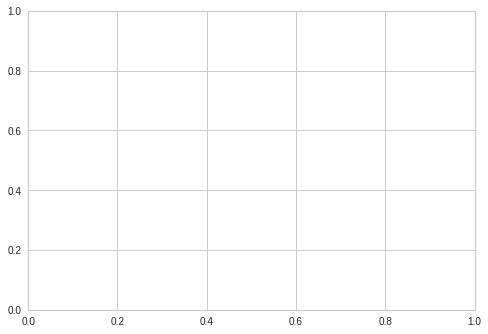

In [0]:
plt.plot(df_co2['Chatelet'][0:100].tolist(), '.-')
plt.plot(df_co2['Auber'][0:100].tolist(), '.-', figsize=(14,5))
plt.plot(df_co2['FR'][0:100].tolist(), '.-', figsize=(14,5))
plt.xlabel('Number of observations')
plt.ylabel('CO2 emissions')
plt.title('100 first CO2 emissions recorded at each station')
plt.legend(['Chatelet', "FR", "Auber"])
plt.show()
#df_co2[0:100].plot.line(figsize=(14,5), style= '.-')

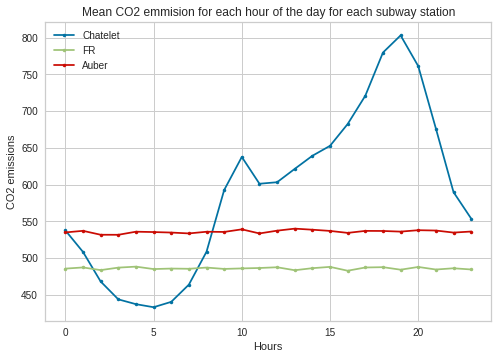

In [0]:
weekdays_emissions = pd.DataFrame([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], columns=['Hour'])
weekdays_emissions['Daily_CO2_Mean_Chatelet'] = df_co2.groupby('Hour')['Chatelet'].mean()
#weekdays_emissions['Daily_CO2_STD_Chatelet'] = df_co2.groupby('Weekday')['Chatelet'].std()
weekdays_emissions['Daily_CO2_Mean_Auber'] = df_co2.groupby('Hour')['Auber'].mean()
#weekdays_emissions['Daily_CO2_STD_Auber'] = df_co2.groupby('Weekday')['Auber'].std()
weekdays_emissions['Daily_CO2_Mean_FR'] = df_co2.groupby('Hour')['FR'].mean()
#weekdays_emissions['Daily_CO2_STD_FR'] = df_co2.groupby('Weekday')['FR'].std()
weekdays_emissions

plt.plot(weekdays_emissions['Hour'].tolist(), weekdays_emissions['Daily_CO2_Mean_Chatelet'].tolist(), '.-')
plt.plot(weekdays_emissions['Hour'].tolist(), weekdays_emissions['Daily_CO2_Mean_FR'].tolist(),'.-')
plt.plot(weekdays_emissions['Hour'].tolist(), weekdays_emissions['Daily_CO2_Mean_Auber'].tolist(),'.-')
plt.xlabel('Hours')
plt.ylabel('CO2 emissions')
plt.title('Mean CO2 emmision for each hour of the day for each subway station')
plt.legend(['Chatelet', "FR", "Auber"])
plt.show()

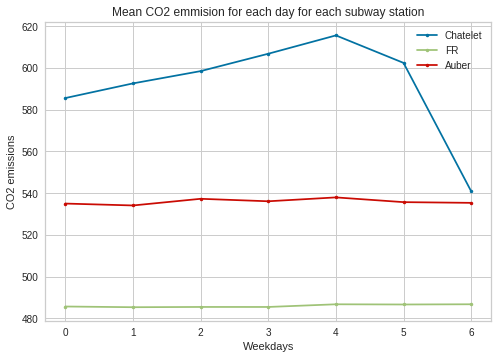

In [0]:
weekdays_emissions = pd.DataFrame([0,1,2,3,4,5,6], columns=['Weekday'])
weekdays_emissions['Daily_CO2_Mean_Chatelet'] = df_co2.groupby('Weekday')['Chatelet'].mean()
#weekdays_emissions['Daily_CO2_STD_Chatelet'] = df_co2.groupby('Weekday')['Chatelet'].std()
weekdays_emissions['Daily_CO2_Mean_Auber'] = df_co2.groupby('Weekday')['Auber'].mean()
#weekdays_emissions['Daily_CO2_STD_Auber'] = df_co2.groupby('Weekday')['Auber'].std()
weekdays_emissions['Daily_CO2_Mean_FR'] = df_co2.groupby('Weekday')['FR'].mean()
#weekdays_emissions['Daily_CO2_STD_FR'] = df_co2.groupby('Weekday')['FR'].std()
weekdays_emissions

plt.plot(weekdays_emissions['Weekday'].tolist(), weekdays_emissions['Daily_CO2_Mean_Chatelet'].tolist(), '.-')
plt.plot(weekdays_emissions['Weekday'].tolist(), weekdays_emissions['Daily_CO2_Mean_FR'].tolist(),'.-')
plt.plot(weekdays_emissions['Weekday'].tolist(), weekdays_emissions['Daily_CO2_Mean_Auber'].tolist(),'.-')
plt.xlabel('Weekdays')
plt.ylabel('CO2 emissions')
plt.title('Mean CO2 emmision for each day for each subway station')
plt.legend(['Chatelet', "FR", "Auber"])
plt.show()

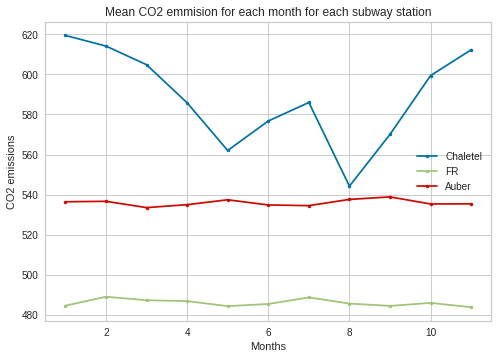

In [0]:
month_emissions = pd.DataFrame([0,1,2,3,4,5,6,7,8,9,10,11], columns=['Month'])
month_emissions['Monthly_CO2_Mean_Chatelet'] = df_co2.groupby('Month')['Chatelet'].mean()
month_emissions['Monthly_CO2_STD_Chatelet'] = df_co2.groupby('Month')['Chatelet'].std()
month_emissions['Monthly_CO2_Mean_FR'] = df_co2.groupby('Month')['FR'].mean()
month_emissions['Monthly_CO2_STD_FR'] = df_co2.groupby('Month')['FR'].std()
month_emissions['Monthly_CO2_Mean_Auber'] = df_co2.groupby('Month')['Auber'].mean()
month_emissions['Monthly_CO2_STD_Auber'] = df_co2.groupby('Month')['Auber'].std()

plt.plot(month_emissions['Month'].tolist(), month_emissions['Monthly_CO2_Mean_Chatelet'].tolist(), y '.-')
plt.plot(month_emissions['Month'].tolist(), month_emissions['Monthly_CO2_Mean_FR'].tolist(),'.-')
plt.plot(month_emissions['Month'].tolist(), month_emissions['Monthly_CO2_Mean_Auber'].tolist(),'.-')
plt.xlabel('Months')
plt.ylabel('CO2 emissions')
plt.title('Mean CO2 emmision for each month for each subway station')
plt.legend(['Chaletel', "FR", "Auber"])
plt.show()

## 3. Models

Autoregression models assume that we have equally time spaced observations. Which we do not.
Maybe a solution here -> https://www.aanda.org/articles/aa/pdf/2019/07/aa35560-19.pdf ie Irregular Autoregressive (IAR) model or CARMA.

Update : No

Instead, as we do not have regular observations, we will focus on multivariate models to consider datetime as an attribute.

Explainations : https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

### Predict CO2 level in a selected station from time of day, past values, temperature and humidity.

## 3.1 Linear regression

### 3.1.1 Linear Regression Simple Attribute

In [0]:
co2_time = df_chatelet[['DATE/HEURE', 'CO2']]
co2_time['DATE/HEURE'] = pd.to_datetime(co2_time['DATE/HEURE'], format='%Y-%m-%dT%H:%M:%S%z')
co2_time['DATE/HEURE'] = co2_time['DATE/HEURE'].apply(lambda x: x.astimezone(tz='utc'))
co2_time['HEURE'] = co2_time['DATE/HEURE'].apply(lambda x: x.hour)
co2_time = co2_time.drop(columns = ['DATE/HEURE'])
co2_time = co2_time.sort_values(by=['HEURE'])
co2_time = co2_time.dropna()
co2_time

,CO2,HEURE
49523,419.0,0
2421,454.0,0
36272,557.0,0
56809,519.0,0
56807,476.0,0
...,...,...
18206,483.0,23
18200,598.0,23
18198,427.0,23
49305,461.0,23


In [0]:
X = co2_time['HEURE']
X = np.array(X).reshape(-1, 1)
standardizer = StandardScaler()
X_std = standardizer.fit_transform(X)
y = co2_time['CO2']
y = np.array(y).reshape(-1, 1)
standardizer = StandardScaler()
y_std = standardizer.fit_transform(y)

0.2446011899427639

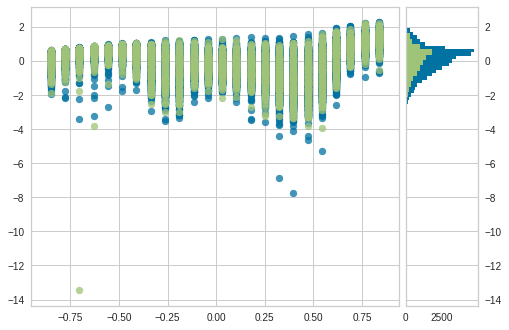

In [0]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.show()                 # Finalize and render the figure

In [0]:
#model.predict(np.array([4]).reshape(-1, 1))

In [0]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.7580263824859605

### 3.1.2 Linear Regression multiple attributes

In [0]:
#Create dataframe for gaz, temperature, humidity and time depending on station
def get_TrainTestSets(df_station, gaz_name):
  if gaz_name == 'pm25':
    gaz = 'PM2.5'
  else:
    gaz = gaz_name.upper()
  co2_thh = df_station[['DATE/HEURE', gaz, 'TEMP', 'HUMI']]
  co2_thh['DATE/HEURE'] = pd.to_datetime(co2_thh['DATE/HEURE'], format='%Y-%m-%dT%H:%M:%S%z')
  co2_thh['DATE/HEURE'] = co2_thh['DATE/HEURE'].apply(lambda x: x.astimezone(tz='utc'))
  co2_thh['HEURE'] = co2_thh['DATE/HEURE'].apply(lambda x: x.hour)
  co2_thh = co2_thh.drop(columns = ['DATE/HEURE'])
  co2_thh = co2_thh.sort_values(by=['HEURE'])
  co2_thh = co2_thh.dropna()
  X = co2_thh[['HEURE','TEMP', 'HUMI']]
  standardizer = StandardScaler()
  X_std = standardizer.fit_transform(X)
  y = co2_thh[gaz]
  y = np.array(y).reshape(-1, 1)
  standardizer = StandardScaler()
  y_std = standardizer.fit_transform(y)
  X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [0]:
X_train, X_test, y_train, y_test = get_TrainTestSets(df_chatelet, 'co2')

0.24829322240005158

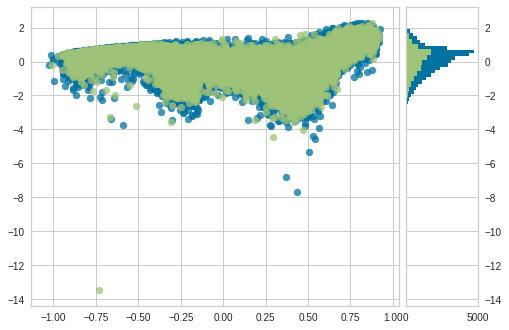

In [0]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
#visualizer.show()    

In [0]:
def get_lr_mse(X_train, X_test, y_train, y_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return mean_squared_error(y_test, y_pred)

In [0]:
get_lr_mse(X_train, X_test, y_train, y_test)

0.7576635250806963

### 3.2 Ridge Regularizer

Text(0.5, 0, 'alpha')

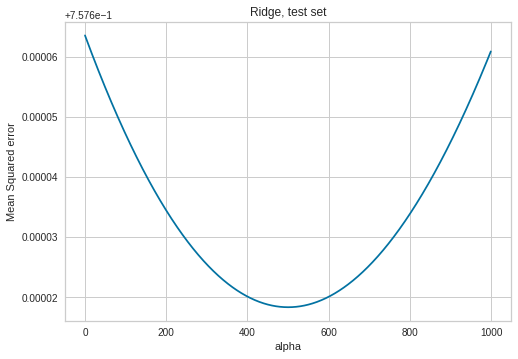

In [0]:
result_test = []
result_train = []

for alpha in range(1000):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    test_pred = ridge.predict(X_test)
    train_pred = ridge.predict(X_train)
    result_test.append(mean_squared_error(y_test, test_pred))
    result_train.append(mean_squared_error(y_train, train_pred))

plt.plot(result_test)
plt.title('Ridge, test set')
plt.ylabel("Mean Squared error")
plt.xlabel('alpha')

Text(0.5, 0, 'alpha')

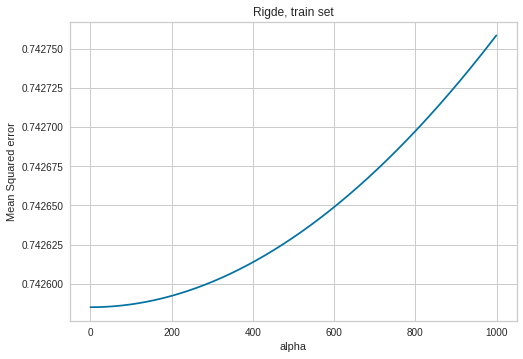

In [0]:
plt.plot(result_train)
plt.title('Rigde, train set')
plt.ylabel("Mean Squared error")
plt.xlabel('alpha')

In [0]:
def get_ridge_mse(X_train, X_test, y_train, y_test):
  ridge = Ridge(alpha=500)
  ridge.fit(X_train, y_train)
  test_pred = ridge.predict(X_test)
  return mean_squared_error(y_test, test_pred)

In [0]:
get_ridge_mse(X_train, X_test, y_train, y_test)

0.7576635250806963

### 3.3 Lasso Regularizer

In [0]:
def get_lasso_mse(X_train, X_test, y_train, y_test):
  clf = linear_model.Lasso()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return mean_squared_error(y_test, y_pred)

In [0]:
get_lasso_mse(X_train, X_test, y_train, y_test)

1.0079243944360523

Text(0.5, 1.0, 'Lasso')

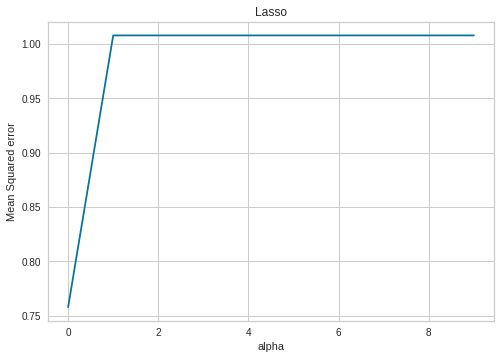

In [0]:
al = []
for i in range(0,10):
    clf = linear_model.Lasso(alpha = i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    al.append(mean_squared_error(y_test, y_pred))

X = [_ for _ in range(0,10)]
plt.plot(X, al)
plt.ylabel("Mean Squared error")
plt.xlabel('alpha')
plt.title('Lasso')

### 3.4 Elastic Net Regularizer

In [0]:
def get_elnet_mse(X_train, X_test, y_train, y_test):
  elNet = ElasticNet()
  elNet.fit(X_train,y_train)
  y_predEN = elNet.predict(X_test)
  return mean_squared_error(y_test,y_predEN)

In [0]:
get_elnet_mse(X_train, X_test, y_train, y_test)

1.0051912687744657

### 3.5 CART (tree)

In [0]:
def get_cart_mse(X_train, X_test, y_train, y_test, max_depth=None, min_samples_split=2):
  tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
  tree = tree.fit(X_train, y_train)
  test_pred = tree.predict(X_test)
  return mean_squared_error(y_test, test_pred)

In [0]:
def show_prepruning(df_station, gaz):

    X_train, X_test, y_train, y_test = get_TrainTestSets(df_station, gaz)
    result_test = []
    result_train = []
    for depth in range(1, 30):
        tree = DecisionTreeRegressor(max_depth=depth)
        tree = tree.fit(X_train, y_train)
        test_pred = tree.predict(X_test)
        result_test.append(mean_squared_error(y_test, test_pred))
        train_pred = tree.predict(X_train)
        result_train.append(mean_squared_error(y_train, train_pred))
    plt.figure(1)   
    plt.plot(range(1,30), result_test, label='test')
    plt.plot(range(1,30), result_train, label='train')
    plt.legend(frameon=True)
    plt.xlabel('Mean Squared Error')
    plt.ylabel('Maximum depth')
    
#     intersect_depth = np.nonzero(np.diff(np.sign(np.array(result_test) - np.array(result_train))))[0][0] + 1

    result_test = []
    result_train = []
    for num in range(2, 500):
        tree = DecisionTreeRegressor(min_samples_split=num)
        tree = tree.fit(X_train, y_train)
        test_pred = tree.predict(X_test)
        result_test.append(mean_squared_error(y_test, test_pred))
        train_pred = tree.predict(X_train)
        result_train.append(mean_squared_error(y_train, train_pred))
    plt.figure(2)
    plt.plot(range(2,500), result_test, label='test')
    plt.plot(range(2,500), result_train, label='train')
    plt.legend(frameon=True)
    plt.xlabel('Mean Squared Error')
    plt.ylabel('Minimum samples per split')
#     intersect_min_sample = np.nonzero(np.diff(np.sign(np.array(result_test) - np.array(result_train))))[0][0] + 2
#     print('Intersection for max_depth {}'.format(intersect_depth))
#     print('Intersection for min_samples {}'.format(intersect_min_sample))    

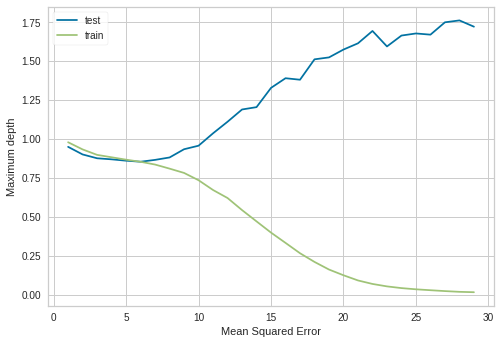

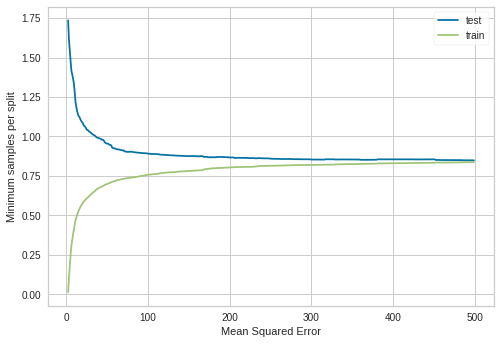

In [0]:
show_prepruning(df_chatelet, 'no')

In [0]:
get_cart_mse(X_train, X_test, y_train, y_test)

0.6997313188434657

### 3.6 Comparing models for gaz at each station

In [0]:
def draw_graph_model_comparaison(gaz, pruning):
    if len(pruning) == 2:
        depth, num_samples = pruning
    else:
        depth_c, num_c, depth_fr, num_fr, depth_a, num_a = pruning
    models_name = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net Regulazier', 'CART']

    if gaz == 'pm25':
        models_auber = []
        X_train, X_test, y_train, y_test = get_TrainTestSets(df_auber, gaz)
        models_auber.append(get_lr_mse(X_train, X_test, y_train, y_test))
        models_auber.append(get_ridge_mse(X_train, X_test, y_train, y_test))
        models_auber.append(get_lasso_mse(X_train, X_test, y_train, y_test))
        models_auber.append(get_elnet_mse(X_train, X_test, y_train, y_test))
        models_auber.append(get_cart_mse(X_train, X_test, y_train, y_test, max_depth=depth, min_samples_split=num_samples))
        plt.plot(models_name, models_auber, 'o')
        plt.xlabel('Models')
        plt.ylabel('Mean Squared Error')
        plt.title('Mean Squared Error for each Model predicting ' + gaz.upper() )
        plt.show()
    else :
        models_chatelet = []
        if len(pruning) > 2:
            depth = depth_c
            num_samples = num_c
        X_train, X_test, y_train, y_test = get_TrainTestSets(df_chatelet, gaz)
        models_chatelet.append(get_lr_mse(X_train, X_test, y_train, y_test))
        models_chatelet.append(get_ridge_mse(X_train, X_test, y_train, y_test))
        models_chatelet.append(get_lasso_mse(X_train, X_test, y_train, y_test))
        models_chatelet.append(get_elnet_mse(X_train, X_test, y_train, y_test))
        models_chatelet.append(get_cart_mse(X_train, X_test, y_train, y_test, max_depth=depth, min_samples_split=num_samples))

        models_fr = []
        if len(pruning) > 2:
            depth = depth_fr
            num_samples = num_fr
        X_train, X_test, y_train, y_test = get_TrainTestSets(df_fr, gaz)
        models_fr.append(get_lr_mse(X_train, X_test, y_train, y_test))
        models_fr.append(get_ridge_mse(X_train, X_test, y_train, y_test))
        models_fr.append(get_lasso_mse(X_train, X_test, y_train, y_test))
        models_fr.append(get_elnet_mse(X_train, X_test, y_train, y_test))
        models_fr.append(get_cart_mse(X_train, X_test, y_train, y_test, max_depth=depth, min_samples_split=num_samples))

        models_auber = []
        if len(pruning) > 2:
            depth = depth_a
            num_samples = num_a
        X_train, X_test, y_train, y_test = get_TrainTestSets(df_auber, gaz)
        models_auber.append(get_lr_mse(X_train, X_test, y_train, y_test))
        models_auber.append(get_ridge_mse(X_train, X_test, y_train, y_test))
        models_auber.append(get_lasso_mse(X_train, X_test, y_train, y_test))
        models_auber.append(get_elnet_mse(X_train, X_test, y_train, y_test))
        models_auber.append(get_cart_mse(X_train, X_test, y_train, y_test, max_depth=depth, min_samples_split=num_samples))

        plt.plot(models_name, models_chatelet, 'o', label='Chatelet')
        plt.plot(models_name, models_fr, 'o', label='Franklin Roosevelt')
        plt.plot(models_name, models_auber, 'o', label='Auber')
        plt.legend(frameon=True, loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
        plt.xlabel('Models')
        plt.ylabel('Mean Squared Error')
        plt.title('Mean Squared Error for each Model predicting ' + gaz.upper() + ' levels, for each station')
        plt.show()

### 3.7 Comparing MSE if CO2 or no CO2

In [0]:
def get_TrainTestSets_co2(df_station, gaz):
  if gaz == 'pm25':
    gaz = 'PM2.5'
  else:
    gaz = gaz.upper()
  co2_thh = df_station[['DATE/HEURE', gaz, 'TEMP', 'HUMI', 'CO2']]
  co2_thh['DATE/HEURE'] = pd.to_datetime(co2_thh['DATE/HEURE'], format='%Y-%m-%dT%H:%M:%S%z')
  co2_thh['DATE/HEURE'] = co2_thh['DATE/HEURE'].apply(lambda x: x.astimezone(tz='utc'))
  co2_thh['HEURE'] = co2_thh['DATE/HEURE'].apply(lambda x: x.hour)
  co2_thh = co2_thh.drop(columns = ['DATE/HEURE'])
  co2_thh = co2_thh.sort_values(by=['HEURE'])
  co2_thh = co2_thh.dropna()
  X = co2_thh[['HEURE','TEMP', 'HUMI']]
  standardizer = StandardScaler()
  X_std = standardizer.fit_transform(X)
  y = co2_thh[gaz]
  y = np.array(y).reshape(-1, 1)
  standardizer = StandardScaler()
  y_std = standardizer.fit_transform(y)
  X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [0]:
def With_or_without_co2(model, gaz):
  With_co2 = []
  Without_co2 = []
  if gaz == 'pm25':
    df_stations = [df_auber]
    Stations = [ 'Auber']
  else:
    df_stations = [df_chatelet, df_fr, df_auber]
    Stations = ['Chatelet', 'Franklin Roosevelt', 'Auber']
  for df in df_stations:
    X_train, X_test, y_train, y_test = get_TrainTestSets(df, gaz)
    X_train_co2, X_test_co2, y_train_co2, y_test_co2 = get_TrainTestSets_co2(df, gaz)
    if model == 'lr':
      Without_co2.append(get_lr_mse(X_train, X_test, y_train, y_test))
      With_co2.append(get_lr_mse(X_train_co2, X_test_co2, y_train_co2, y_test_co2))  
    elif model == 'CART':
      Without_co2.append(get_cart_mse(X_train, X_test, y_train, y_test))
      With_co2.append(get_cart_mse(X_train_co2, X_test_co2, y_train_co2, y_test_co2))  
  plt.plot(Stations, With_co2, 'o')
  plt.plot(Stations, Without_co2, 'o')
  plt.legend(labels = ['With CO2', 'Without CO2'])
  plt.xlabel('Stations')
  plt.ylabel('Mean Squared Error')
  plt.title('Mean Squared Error for each Station depending on if CO2 was used as an attribute or not')
  plt.show()

### 3.8 Predict level of gaz depending on two other stations

In [0]:
def other_stations_VS_attributes(model, gaz, with_co2 = False ):
  Stat = []
  Attr = []
  stations = [df_chatelet, df_fr, df_auber]
  for df in stations:
    X_train_stat, X_test_stat, y_train_stat, y_test_stat = get_TrainTestSets_OtherStations(df, gaz)
    if with_co2:
      X_train, X_test, y_train, y_test = get_TrainTestSets_co2(df, gaz)
    else:
      X_train, X_test, y_train, y_test = get_TrainTestSets(df, gaz)
    if model == 'lr':
      Stat.append(get_lr_mse(X_train_stat, X_test_stat, y_train_stat, y_test_stat))
      Attr.append(get_lr_mse(X_train, X_test, y_train, y_test)) 
    elif model == 'CART':
      Stat.append(get_lr_mse(X_train_stat, X_test_stat, y_train_stat, y_test_stat))
      Attr.append(get_lr_mse(X_train, X_test, y_train, y_test)) 
  Stations = ['Chatelet', 'Franklin Roosevelt', 'Auber']
  plt.plot(Stations, Stat, 'o')
  plt.plot(Stations, Attr, 'o')
  plt.legend(labels = ['Other two stations', 'Station attributes'])
  plt.xlabel('Stations')
  plt.ylabel('Mean Squared Error')
  plt.title('Mean Squared Error for each Station depending on other two stations or in station attributes')
  plt.show()

#Plot predict with two other stations 
#plot with other attributes 

In [0]:
def get_TrainTestSets_OtherStations(df_station, gaz):
  gaz = gaz.upper() 
  stations = [df_chatelet, df_fr, df_auber]
  for i in range(len(stations)):
    print(i)
    print(df_station)
    #print(stations[i])
    if df_station.equals(stations[i]):
      stations.remove(df_station)
  print("done")

  co2_thh = df_station[['DATE/HEURE', gaz]]
  co2_thh['DATE/HEURE'] = pd.to_datetime(co2_thh['DATE/HEURE'], format='%Y-%m-%dT%H:%M:%S%z')
  co2_thh['DATE/HEURE'] = co2_thh['DATE/HEURE'].apply(lambda x: x.astimezone(tz='utc'))
  co2_thh['HEURE'] = co2_thh['DATE/HEURE'].apply(lambda x: x.hour)
  co2_thh = co2_thh.drop(columns = ['DATE/HEURE'])
  co2_thh = co2_thh.sort_values(by=['HEURE'])

  #print(str(stations[0]))
  co2_2 = stations[0][['DATE/HEURE', gaz]]
  co2_2['DATE/HEURE'] = pd.to_datetime(co2_2['DATE/HEURE'], format='%Y-%m-%dT%H:%M:%S%z')
  co2_2['DATE/HEURE'] = co2_2['DATE/HEURE'].apply(lambda x: x.astimezone(tz='utc'))
  co2_2['HEURE'] = co2_2['DATE/HEURE'].apply(lambda x: x.hour)
  co2_2 = co2_2.drop(columns = ['DATE/HEURE'])
  co2_2 = co2_2.sort_values(by=['HEURE'])
  co2_thh['CO2_2'] = co2_2['CO2']

  #print(str(stations[1]))
  co2_3 = stations[1][['DATE/HEURE', gaz]]
  co2_3['DATE/HEURE'] = pd.to_datetime(co2_3['DATE/HEURE'], format='%Y-%m-%dT%H:%M:%S%z')
  co2_3['DATE/HEURE'] = co2_3['DATE/HEURE'].apply(lambda x: x.astimezone(tz='utc'))
  co2_3['HEURE'] = co2_3['DATE/HEURE'].apply(lambda x: x.hour)
  co2_3 = co2_3.drop(columns = ['DATE/HEURE'])
  co2_3 = co2_3.sort_values(by=['HEURE'])
  co2_thh['CO2_3'] = co2_3['CO2']

  co2_thh = co2_thh.dropna()

  X = co2_thh[['HEURE','CO2_2', 'CO2_3']]
  standardizer = StandardScaler()
  X_std = standardizer.fit_transform(X)
  y = co2_thh[gaz]
  y = np.array(y).reshape(-1, 1)
  standardizer = StandardScaler()
  y_std = standardizer.fit_transform(y)
  X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

## 4. CO2 

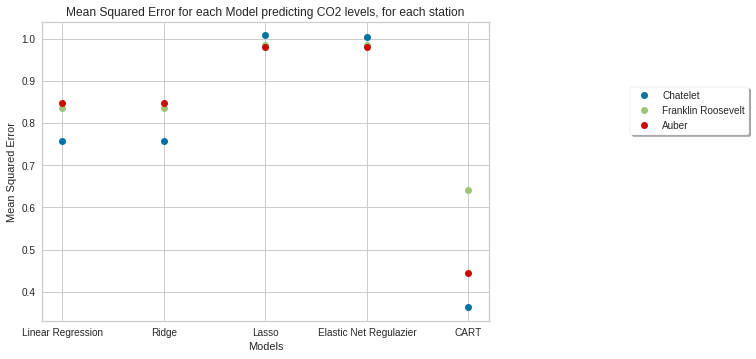

In [0]:
draw_graph_model_comparaison('co2', (7, 300))

In [0]:
other_stations_VS_attributes('CART', 'co2')

0
                      DATE/HEURE    NO   NO2   PM10    CO2  TEMP  HUMI
0      2013-03-07T20:00:00+01:00  88.0  61.0  157.0  931.0  20.1  56.3
1      2013-03-10T11:00:00+01:00   6.0  34.0   53.0  546.0  17.2  47.9
2      2013-03-11T17:00:00+01:00  27.0  39.0   97.0  750.0  16.1  40.0
3      2013-03-12T04:00:00+01:00   NaN  30.0    NaN  455.0  13.3  36.5
4      2013-03-13T02:00:00+01:00   NaN  30.0   32.0  459.0  12.3  29.4
...                          ...   ...   ...    ...    ...   ...   ...
59890  2019-11-02T12:00:00+01:00   6.0  21.0   60.0  591.0  19.6  52.2
59891  2019-11-02T16:00:00+01:00  13.0  25.0   92.0  649.0  19.8  49.0
59892  2019-11-03T01:00:00+01:00  10.0  25.0   36.0  539.0  19.1  50.5
59893  2019-11-03T05:00:00+01:00   4.0  23.0    NaN  429.0  19.0  51.3
59894  2019-11-03T11:00:00+01:00   7.0  28.0   34.0  462.0  19.8  54.6

[59895 rows x 7 columns]
1
                      DATE/HEURE    NO   NO2   PM10    CO2  TEMP  HUMI
0      2013-03-07T20:00:00+01:00  88.0  61.0  1

IndexError: ignored

## 5. NO

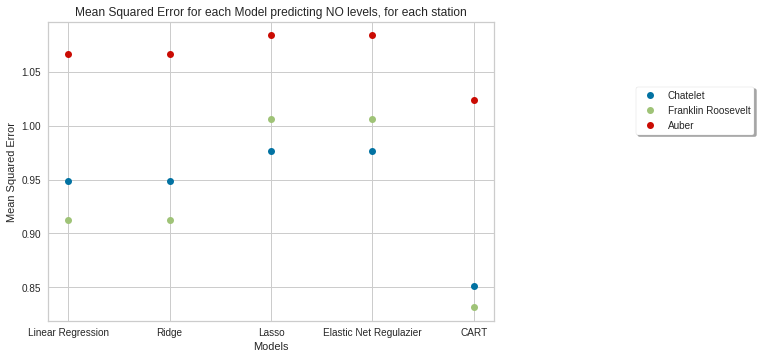

In [0]:
draw_graph_model_comparaison('no', (6, 300))

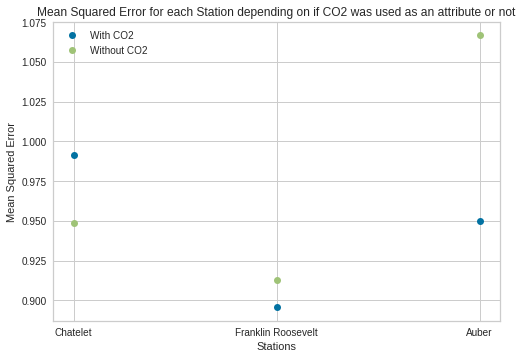

In [0]:
With_or_without_co2('lr', 'no')

## 6. NO2

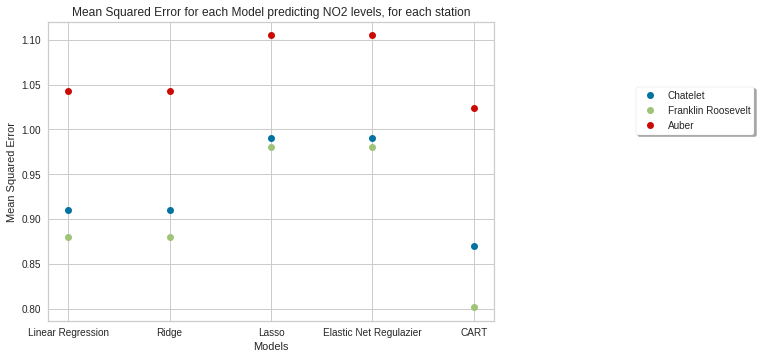

In [0]:
draw_graph_model_comparaison('no2', (3, 300, 5, 300, 8, 300))

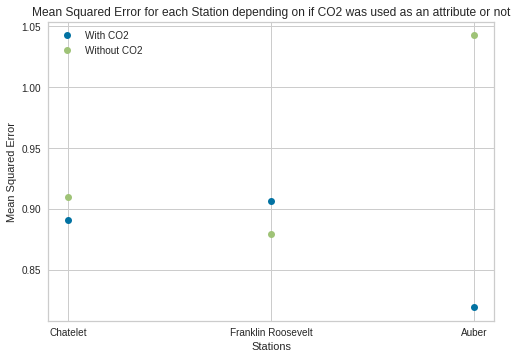

In [0]:
With_or_without_co2('lr', 'no2')

## 7. PM10

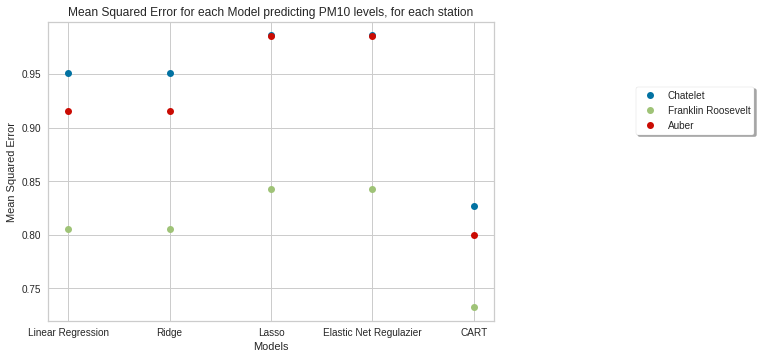

In [0]:
draw_graph_model_comparaison('pm10', (6, 300, 9, 300, 5, 300))

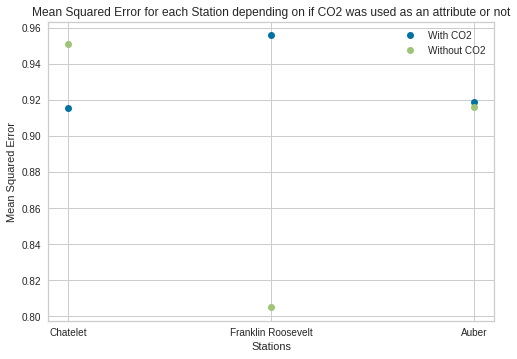

In [0]:
With_or_without_co2('lr', 'pm10')

## 8. PM2.5

In [0]:
draw_graph_model_comparaison('pm25', (6,300))

In [0]:
With_or_without_co2('lr', 'pm25')

## 9. Additional stuff / To clean ?

Multivariate and linear = VAR, VMA, VARMA

### Vector Autoregression (VAR)

Source : https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [0]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VAR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

********************

In [0]:
def pred_co2(station, date):
    co2 = station[['DATE/HEURE', 'CO2', 'TEMP', 'HUMI']]
    co2['DATE/HEURE'] = pd.to_datetime(co2['DATE/HEURE'], format='%Y-%m-%dT%H:%M:%S%z')
    co2['DATE/HEURE'] = co2['DATE/HEURE'].apply(lambda x: x.astimezone(tz='utc'))
    

In [0]:
df_chatelet.head()

In [0]:
co2 = df_chatelet[['DATE/HEURE', 'CO2', 'TEMP', 'HUMI']]

In [0]:
type(co2['DATE/HEURE'][0])

In [0]:
co2['DATE/HEURE'] = pd.to_datetime(co2['DATE/HEURE'], format='%Y-%m-%dT%H:%M:%S%z')
co2['DATE/HEURE'] = co2['DATE/HEURE'].apply(lambda x: x.astimezone(tz='utc'))
co2['HEURE'] = co2['DATE/HEURE'].apply(lambda x: x.hour)

In [0]:
co2.dtypes

In [0]:
# date = dt.datetime(2013, 3, 7, hour=19, tzinfo=dt.timezone.utc)
date = np.datetime64('2013-03-07T19:00:00.000000000')

In [0]:
# Predict the co2 level based on the co2 level of the day before
def simple_co2(data, date):
    return data['CO2'][data['DATE/HEURE'] == date - dt.timedelta(days=1)].values

In [0]:
print(simple_co2(co2, date))

### Showing autocorrelation (non)

In [0]:
pd.plotting.lag_plot(co2[['CO2']])